<a href="https://colab.research.google.com/github/KimJisanER/RDKit-Bioinf/blob/main/Chemical_space_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 46.9 MB/s eta 0:00:00


In [3]:
from __future__ import print_function
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

In [5]:
df = pd.read_csv('chembl_drugs.txt.gz', sep='\t')

In [6]:
print(len(df))

11442


In [10]:
df.head(5)

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,PRODRUG,ORAL,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES
0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,1984.0,...,Y,N,N,Y,N,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...
1,112655,CHEMBL1009,"Levodopa (BAN, FDA, INN, JAN, USAN, USP)",4,NaN,Shire Development Inc; Orion Pharma; Merck Sha...,-dopa,dopamine receptor agonists,-dopa,1969.0,...,N,Y,N,N,N,Prescription-only,NaN,NaN,NaN,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O
2,993371,CHEMBL1569487,"Lornoxicam (BAN, INN, USAN)",3,Ro-139297,"Cl Pharma Ag, Austria",-icam,anti-inflammatory agents (isoxicam type),-icam,1993.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN1C(=C(O)c2sc(Cl)cc2S1(=O)=O)C(=O)Nc3ccccn3
3,435293,CHEMBL270190,"Alvimopan (BAN, FDA, INN, USAN)",4,ADL 8-2698,Cubist Pharmaceuticals Inc,NaN,NaN,NaN,2002.0,...,N,Y,N,N,Y,Prescription-only,NaN,NaN,NaN,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...
4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,...,N,Y,N,Y,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3


In [11]:
df = df[df['CANONICAL_SMILES'].notnull() & # Keep cpds with SMILES
        df['USAN_STEM'].notnull() & # USAN stem
        (df['RULE_OF_FIVE'] == 'Y') & # that respect Ro5
        (df['DEVELOPMENT_PHASE'] == 4)] # are on the market

In [12]:
len(df)

700

In [13]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='CANONICAL_SMILES')

/usr/local/lib/python3.9/dist-packages/rdkit/Chem/PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


In [15]:
df.head(5)

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,ORAL,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol
0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,1984.0,...,N,N,Y,N,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f7491422a50>
1,112655,CHEMBL1009,"Levodopa (BAN, FDA, INN, JAN, USAN, USP)",4,NaN,Shire Development Inc; Orion Pharma; Merck Sha...,-dopa,dopamine receptor agonists,-dopa,1969.0,...,Y,N,N,N,Prescription-only,NaN,NaN,NaN,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f7491422b30>
4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,...,Y,N,Y,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,<rdkit.Chem.rdchem.Mol object at 0x7f7491422ba0>
5,139014,CHEMBL1068,"Oxcarbazepine (BAN, FDA, INN, USAN)",4,GP-47680; KIN-493,Supernus Pharmaceuticals Inc; Novartis Pharmac...,-pin(e),tricyclic compounds,-pin(e),2002.0,...,Y,N,N,Y,Prescription-only,NaN,NaN,NaN,NC(=O)N1c2ccccc2CC(=O)c3ccccc13,<rdkit.Chem.rdchem.Mol object at 0x7f7491422c10>
11,691867,CHEMBL1229517,"Vemurafenib (FDA, INN, USAN)",4,PLX-4032; RG-7204; Ro-5185426,Hoffmann La Roche Inc,-rafenib,raf kinase inhibitors,-rafenib,2010.0,...,Y,N,N,N,Prescription-only,NaN,NaN,NaN,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(cc23)...,<rdkit.Chem.rdchem.Mol object at 0x7f7491422c80>


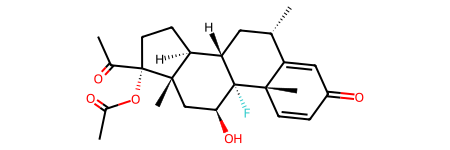

In [16]:
df['ROMol'][0]

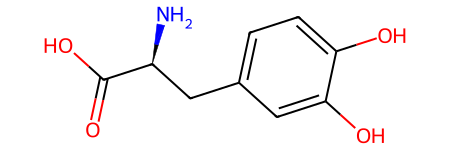

In [17]:
df['ROMol'][1]

In [18]:
df = df[~df['ROMol'].isnull()]

In [19]:
len(df)

700

In [20]:
common_stems = df.groupby('USAN_STEM').size().sort_values()[-10:]
common_stems

USAN_STEM
-tinib     12
-olone     12
-pin(e)    12
-ium       14
-vir       15
-caine     15
-oxacin    17
-cillin    17
-olol      18
sulfa-     18
dtype: int64

In [23]:
stems = df.drop_duplicates(['USAN_STEM'])[df.drop_duplicates(['USAN_STEM'])['USAN_STEM'].isin(common_stems.index)][['USAN_STEM','USAN_STEM_DEFINITION']]
stems.index = stems['USAN_STEM']
stems['count'] = common_stems

In [24]:
stems

,USAN_STEM,USAN_STEM_DEFINITION,count
USAN_STEM,,,
-olone,-olone,steroids (not prednisolone derivatives),12
-oxacin,-oxacin,antibacterials (quinolone derivatives),17
-pin(e),-pin(e),tricyclic compounds,12
-tinib,-tinib,tyrosine kinase inhibitors,12
-caine,-caine,local anesthetics,15
sulfa-,sulfa-,antimicrobials (sulfonamides derivatives),18
-vir,-vir,antivirals: antivirals (acyclovir type),15
-ium,-ium,quaternary ammonium derivatives,14
-cillin,-cillin,penicillins,17


In [32]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

class FP:
    """
    Molecular fingerprint class, useful to pack features in pandas df
    
    Parameters  
    ---------- 
    fp : np.array
        Features stored in numpy array
    names : list, np.array
        Names of the features
    """
    def __init__(self, fp, names):
        self.fp = fp
        self.names = names
    def __str__(self):
        return "%d bit FP" % len(self.fp)
    def __len__(self):
        return len(self.fp)

def get_cfps(mol, radius=2, nBits=1024, useFeatures=False, counts=False, dtype=np.float32):
    """Calculates circular (Morgan) fingerprint.  
    http://rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints  
    
    Parameters
    ----------
    mol : rdkit.Chem.rdchem.Mol
    radius : float 
        Fingerprint radius, default 2
    nBits : int 
        Length of hashed fingerprint (without descriptors), default 1024
    useFeatures : bool  
        To get feature fingerprints (FCFP) instead of normal ones (ECFP), defaults to False
    counts : bool
        If set to true it returns for each bit number of appearances of each substructure (counts). Defaults to false (fingerprint is binary)
    dtype : np.dtype
        Numpy data type for the array. Defaults to np.float32 because it is the default dtype for scikit-learn
    
    Returns
    -------
    ML.FP
        Fingerprint (feature) object
    """
    arr = np.zeros((1,), dtype)
    
    if counts is True:
        info = {}
        fp = AllChem.GetHashedMorganFingerprint(mol, radius, nBits, useFeatures=useFeatures)
        DataStructs.ConvertToNumpyArray(fp, arr)
    else:
        DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits, useFeatures=useFeatures), arr)
    return FP(arr, range(nBits))

In [33]:
df['FP'] = df['ROMol'].map(get_cfps)

Extract compounds that belong to 10 most common USAN stems

In [34]:
df_small = df[df['USAN_STEM'].isin(list(stems.index))].copy()

In [35]:
len(df_small)

150

# **PCA analysis**

In [36]:
from sklearn.decomposition import PCA

In [37]:
X = np.array([x.fp for x in df_small['FP']])

In [40]:
X.shape

(150, 1024)

In [41]:
pca = PCA(n_components=3, random_state=0)
pca_drugs = pca.fit_transform(X)

In [42]:
df_small['PC1'] = pca_drugs.T[0]
df_small['PC2'] = pca_drugs.T[1]
df_small['PC3'] = pca_drugs.T[2]

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

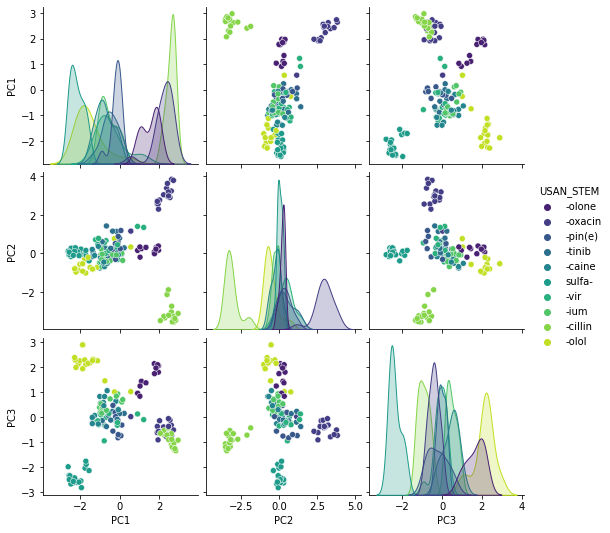

In [44]:
#doctest: IGNORE
sns.pairplot(df_small, hue='USAN_STEM', vars=['PC1', 'PC2', 'PC3'], palette='viridis');

#**t-SNE**
#####Note that t-SNE is very sensitive to hyperparameter settings.

### Without PCA preprocessing

In [45]:
from sklearn.manifold import TSNE

In [46]:
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_drugs = model.fit_transform(X)

In [47]:
df_small['TSNE_C1'] = tsne_drugs.T[0]
df_small['TSNE_C2'] = tsne_drugs.T[1]

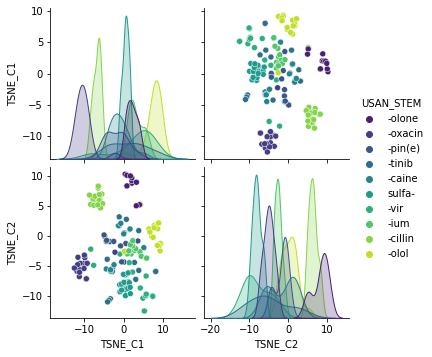

In [48]:
#doctest: IGNORE
sns.pairplot(df_small, hue='USAN_STEM', vars=['TSNE_C1', 'TSNE_C2'], palette='viridis');

###With PCA preprocessing

In case of high dimensionality data (like molecular fingerprints) it is recommended to reduce the number of dimensions with another method before proceeding with t-SNE.

In [49]:
pca_model = PCA(n_components=30, random_state=0)
tsne_model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_pca_drugs = tsne_model.fit_transform(pca_model.fit_transform(X))

In [50]:
df_small['TSNE_PCA_C1'] = tsne_pca_drugs.T[0]
df_small['TSNE_PCA_C2'] = tsne_pca_drugs.T[1]

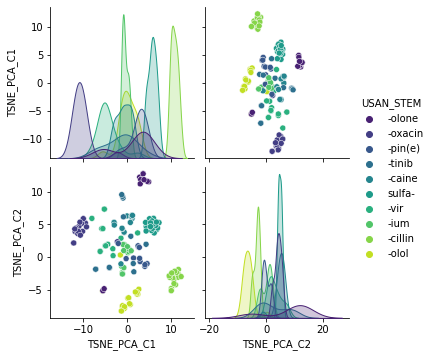

In [51]:
#doctest: IGNORE
sns.pairplot(df_small, hue='USAN_STEM', vars=['TSNE_PCA_C1', 'TSNE_PCA_C2'], palette='viridis');

Tutorial author: Samo Turk, Jan. 2017